<a href="https://colab.research.google.com/github/yuxinlg/Python/blob/mycode/Assignment_2_Yuxin_Liang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
from PIL import Image
import seaborn as sns
import matplotlib.patches as mpatches

###set working direction
os.chdir('/content/drive/MyDrive/MSSP-607/Assignments/Assignment_2')

###import dataset
sale = spd = pd.read_csv("/content/drive/MyDrive/MSSP-607/Data/InternetSales.csv")
#sale.head()
#sale.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1. What are the Internet sales of AdventureWorks by year for each Country Region?
2. Generate summary statistics including min, max, and standard deviation for Yearly Income, Gender by Country Regions.  
3. What is the average price of the product category that generates the most sales?
4. Does owning a home make a difference in sales? Explain your analysis.

**What are the Internet sales of AdventureWorks by year for each Country Region?**

In [ ]:
###select sales-related subset 
sale_country = sale[['CountryRegionCode','EnglishCountryRegionName','DateFirstPurchase', 'ProductKey','EnglishProductName','OrderDateKey','DueDateKey','ShipDateKey','PromotionKey',
                     'CustomerKey.1','RevisionNumber','OrderQuantity','UnitPrice','ExtendedAmount','UnitPriceDiscountPct','DiscountAmount','SalesAmount',
                     'ProductStandardCost','TotalProductCost']]
sale_country['EnglishCountryRegionName'].unique()#get a glance of unique country names
sale_country['year'] = pd.DatetimeIndex(sale_country['DateFirstPurchase']).year#extract year from date time
sale_country['totalprice'] = sale_country['OrderQuantity']*sale_country['UnitPrice']

###
sale_country_price = pd.DataFrame(sale_country.groupby(['EnglishCountryRegionName','year'])['totalprice'].sum()/10000).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
###check the result
sale_country_price

,EnglishCountryRegionName,year,totalprice
0,Australia,2010,4.090393
1,Australia,2011,432.304228
2,Australia,2012,428.746484
3,Australia,2013,40.700539
4,Australia,2014,0.258415
5,Canada,2010,0.411826
6,Canada,2011,74.422631
7,Canada,2012,37.693423
8,Canada,2013,85.145483
9,Canada,2014,0.111123


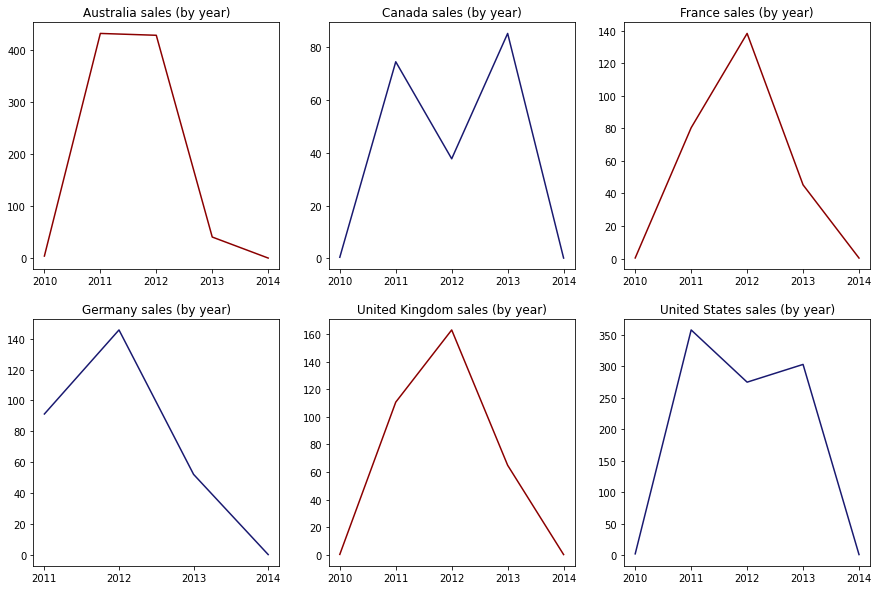

In [ ]:
#create sale figures by country and year
figure, axis = plt.subplots(2, 3,
                            figsize=(15, 10))
#Australia
axis[0,0].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="Australia"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="Australia"]["totalprice"],color = 'darkred')
axis[0,0].locator_params(integer=True)
axis[0,0].set_title('Australia sales (by year)')

#Canada
axis[0,1].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="Canada"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="Canada"]["totalprice"],color = 'midnightblue')
axis[0,1].locator_params(integer=True)
axis[0,1].set_title('Canada sales (by year)')

#France
axis[0,2].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="France"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="France"]["totalprice"],color = 'darkred')
axis[0,2].locator_params(integer=True)
axis[0,2].set_title('France sales (by year)')

#Germany
axis[1,0].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="Germany"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="Germany"]["totalprice"],color = 'midnightblue')
axis[1,0].locator_params(integer=True)
axis[1,0].set_title('Germany sales (by year)')

#United Kingdom
axis[1,1].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="United Kingdom"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="United Kingdom"]["totalprice"],color = 'darkred')
axis[1,1].locator_params(integer=True)
axis[1,1].set_title('United Kingdom sales (by year)')

#United States
axis[1,2].plot(sale_country_price[sale_country_price.EnglishCountryRegionName=="United States"]["year"], 
               sale_country_price[sale_country_price.EnglishCountryRegionName=="United States"]["totalprice"], color = 'midnightblue')
axis[1,2].locator_params(integer=True)
axis[1,2].set_title('United States sales (by year)')

plt.show()
figure.savefig('figure 1.jpg')



**Generate summary statistics including min, max, and standard deviation for Yearly Income, Gender by Country Regions.**

In [ ]:
###generate descriptive statistics of yearly income by country and gender
sale_income = sale[['Gender','YearlyIncome','EnglishCountryRegionName']]
sale_income_stat = pd.DataFrame(sale_income.groupby(['EnglishCountryRegionName','Gender'])['YearlyIncome'].agg([min,max,np.mean,np.median,np.std]).round(2))
sale_income_stat

min       max      mean   median  \
EnglishCountryRegionName Gender                                         
Australia                F       10000.0  160000.0  67060.58  70000.0   
                         M       10000.0  170000.0  65412.91  70000.0   
Canada                   F       10000.0  170000.0  58651.32  60000.0   
                         M       10000.0  170000.0  61460.22  60000.0   
France                   F       10000.0  110000.0  39367.13  30000.0   
                         M       10000.0  110000.0  39805.55  30000.0   
Germany                  F       10000.0  130000.0  48287.23  30000.0   
                         M       10000.0  130000.0  46730.84  30000.0   
United Kingdom           F       10000.0  170000.0  56518.67  30000.0   
                         M       10000.0  170000.0  55771.75  30000.0   
United States            F       10000.0  170000.0  64766.90  60000.0   
                         M       10000.0  170000.0  65450.20  60000.0   

                                      std  
EnglishCountryRegionName Gender            
Australia                F       30613.96  
                         M       32550.78  
Canada                   F       19435.16  
                         M       22702.85  
France                   F       28421.84  
                         M       28665.66  
Germany                  F       37622.81  
                         M       37487.62  
United Kingdom           F       51130.69  
                         M       50963.71  
United States            F       25498.81  
                         M       26520.35

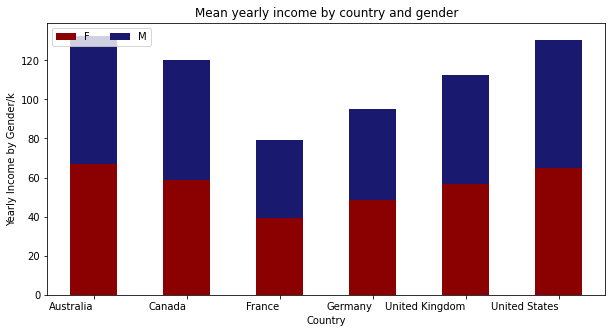

<Figure size 432x288 with 0 Axes>

In [ ]:
###generate bar plot of yearly income by country and gender
sale_income_bar = pd.DataFrame(sale_income.groupby(['EnglishCountryRegionName','Gender']).mean()/1000).reset_index()
sale_income_bar = pd.pivot(sale_income_bar, index='EnglishCountryRegionName', columns='Gender', values='YearlyIncome').reset_index()#reshape the data

sale_income_bar.plot.bar(x='EnglishCountryRegionName', stacked=True,color=['darkred', 'midnightblue'],
                         figsize=(10,5))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Country")
plt.xticks(rotation=0, ha='right')
plt.ylabel("Yearly Income by Gender/k")
plt.title('Mean yearly income by country and gender')
                                            
plt.show()
plt.savefig("figure 2.jpg")

In [ ]:
sale_income_bar

Gender,EnglishCountryRegionName,F,M
0,Australia,67.060583,65.412913
1,Canada,58.651316,61.460222
2,France,39.367134,39.805546
3,Germany,48.287234,46.730838
4,United Kingdom,56.518671,55.771755
5,United States,64.766898,65.450197


In [ ]:
###t-test
print(stats.ttest_ind(sale[(sale.EnglishCountryRegionName=="Australia") &
     (sale.Gender=="M")]["YearlyIncome"],
     sale[(sale.EnglishCountryRegionName=="Australia") &
     (sale.Gender=="F")]["YearlyIncome"]))
print(stats.ttest_ind(sale[(sale.EnglishCountryRegionName=="United States") &
     (sale.Gender=="M")]["YearlyIncome"],
     sale[(sale.EnglishCountryRegionName=="United States") &
     (sale.Gender=="F")]["YearlyIncome"]))

Ttest_indResult(statistic=-3.0121394424203825, pvalue=0.0025989947963567105)
Ttest_indResult(statistic=1.918711691247754, pvalue=0.05503415476043523)


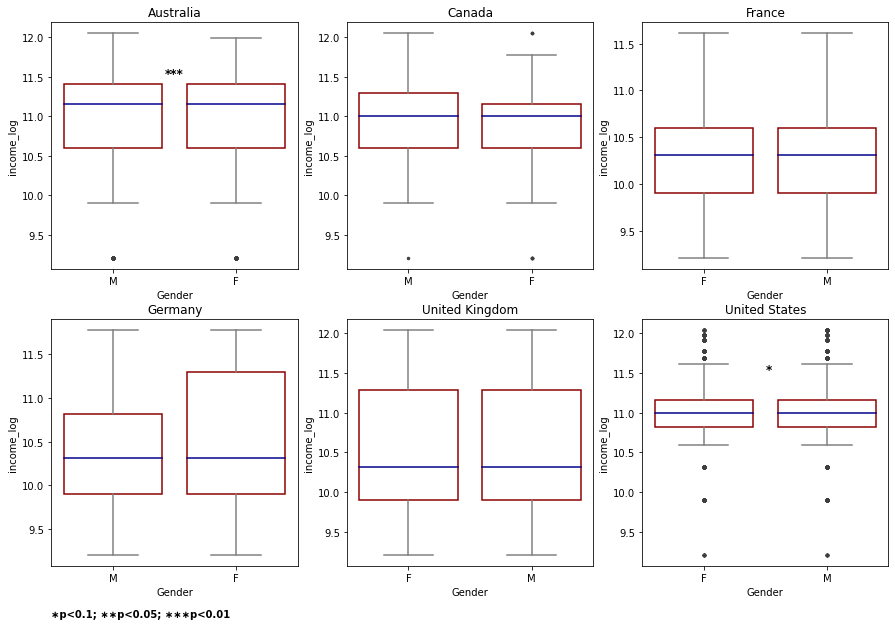

In [ ]:
###differences visulazition
sale['income_log']=np.log(sale['YearlyIncome'])##log the income

##set color
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'darkred'},
    'medianprops':{'color':'darkblue'},
    'whiskerprops':{'color':'grey'},
    'capprops':{'color':'grey'}
}

figure, axis = plt.subplots(2, 3,
                            figsize=(15, 10))

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='Australia'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[0,0]).set(title='Australia')
axis[0,0].text(0.5, 11.5, "***", horizontalalignment='center', size='large', color='black', weight='semibold')

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='Canada'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[0,1]).set(title='Canada')

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='France'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[0,2]).set(title='France')

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='Germany'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[1,0]).set(title='Germany')
axis[1,0].text(-0.5,8.5,'∗p<0.1; ∗∗p<0.05; ∗∗∗p<0.01',horizontalalignment='left',size='medium', color='black', weight='semibold')

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='United Kingdom'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[1,1]).set(title='United Kingdom')

sns.boxplot(data=sale[sale.EnglishCountryRegionName=='United States'],x="Gender", y="income_log",
                  flierprops={"marker": "."},
                  **PROPS,
            ax=axis[1,2]).set(title='United States')
axis[1,2].text(0.5, 11.5, "*", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.savefig("figure income.jpg")

**What is the average price of the product category that generates the most sales?**

In [ ]:
###select the most popular product
sale_price = sale[['EnglishProductName','ProductKey','UnitPrice','TotalProductCost','ProductStandardCost','OrderQuantity']]
sale_price_prd = pd.DataFrame(sale_price.groupby('EnglishProductName')[['OrderQuantity','UnitPrice']].agg({'OrderQuantity':'sum','UnitPrice':'mean'}).round(2)).reset_index()##calculate sale amount by productname
sale_price_prd = sale_price_prd.sort_values('OrderQuantity',ascending=False)##get the most sold product
sale_price_prd

,EnglishProductName,OrderQuantity,UnitPrice
126,Water Bottle - 30 oz.,4244,4.99
52,Patch Kit/8 Patches,3191,2.29
23,Mountain Tire Tube,3095,4.99
56,Road Tire Tube,2376,3.99
101,"Sport-100 Helmet, Red",2230,34.99
...,...,...,...
48,"Mountain-500 Silver, 42",45,564.99
29,"Mountain-100 Silver, 42",42,3399.99
46,"Mountain-500 Black, 52",41,539.99
49,"Mountain-500 Silver, 44",39,564.99


**Does owning a home make a difference in sales? Explain your analysis.**

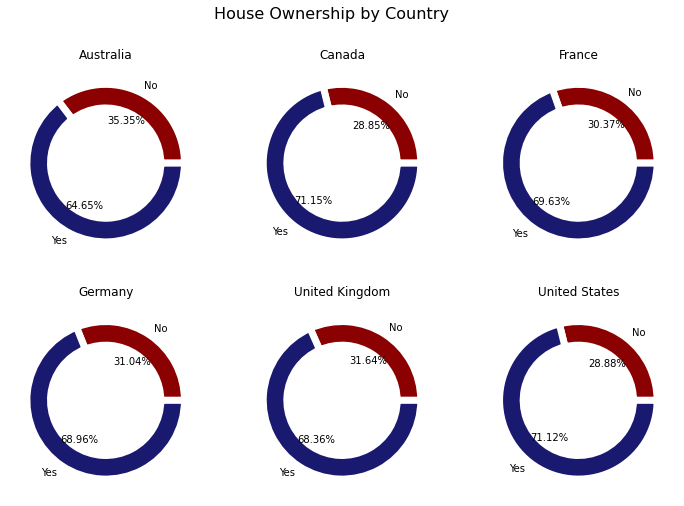

In [ ]:
###descriptive statistics of house ownership
sale_country_house = pd.DataFrame(sale.groupby(['EnglishCountryRegionName','HouseOwnerFlag']).size().reset_index(name='counts'))
#sale_country_house = pd.pivot(sale_country_house, index='EnglishCountryRegionName', columns='HouseOwnerFlag', values='counts').reset_index()#reshape the data
sale_country_house.loc[sale_country_house.HouseOwnerFlag==0,"HouseOwnerFlag"]='No'
sale_country_house.loc[sale_country_house.HouseOwnerFlag==1,"HouseOwnerFlag"]='Yes'

figure, ((ax1, ax2, ax3),
         (ax4, ax5, ax6)) = plt.subplots(2, 3,
                            figsize=(12, 8))

ax1.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='Australia']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='Australia']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax1.set_title('Australia')

ax2.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='Canada']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='Canada']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax2.set_title('Canada')

ax3.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='France']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='France']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax3.set_title('France')

ax4.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='Germany']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='Germany']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax4.set_title('Germany')

ax5.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='United Kingdom']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='United Kingdom']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax5.set_title('United Kingdom')

ax6.pie(sale_country_house[sale_country_house.EnglishCountryRegionName=='United States']['counts'], 
        labels=sale_country_house[sale_country_house.EnglishCountryRegionName=='United States']['HouseOwnerFlag'], 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width' : 0.3 },
        colors = ['darkred','midnightblue'],
        autopct='%1.2f%%')
ax6.set_title('United States')

plt.suptitle('House Ownership by Country', fontsize=16)
plt.show()
figure.savefig('figure 3.jpg')


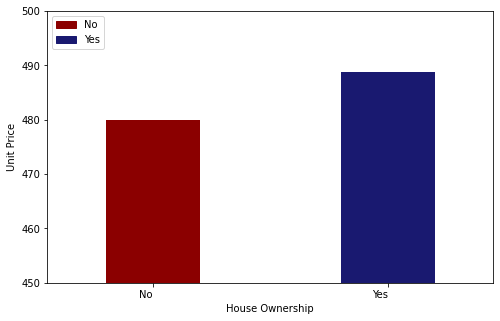

In [ ]:
###relationsip between home ownship and unitprice
sale_unit = pd.DataFrame(sale.groupby('HouseOwnerFlag')['UnitPrice'].mean().reset_index())
sale_unit.plot.bar(x='HouseOwnerFlag',
                   y="UnitPrice",
                   ylim=[450, 500],
                   figsize=(8,5),
                   width=0.4,
                   color=['darkred','midnightblue'])
plt.xlabel("House Ownership")
plt.xticks(np.arange(2), ['No', 'Yes'],rotation=0, ha='right')
plt.ylabel("Unit Price")
No = mpatches.Patch(color='darkred', label='No')
Yes = mpatches.Patch(color='midnightblue', label='Yes')
plt.legend(handles=[No,Yes], loc=2)
plt.savefig("figure 4.jpg")

In [ ]:
#t-test
stats.ttest_ind(sale[sale.HouseOwnerFlag==0]['UnitPrice'],
                sale[sale.HouseOwnerFlag==1]['UnitPrice'])

Ttest_indResult(statistic=-1.0996758477900557, pvalue=0.27147776482455277)